## Importing Libraries

In [1]:
import numpy as np
import os
import sys
import pandas as pd
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

Using TensorFlow backend.


### Function for feature extraction

In [2]:

def extract_mfcc(wav_file_name):

    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

### Loading Data

In [3]:
radvess_speech_labels = [] 
ravdess_speech_data = [] 
for dirname, _, filenames in os.walk('F:\\107620_256618_bundle_archive\\'):
    for filename in filenames:
        
        radvess_speech_labels.append(int(filename[7:8]) - 1)
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name))

In [4]:
emotion_df = pd.DataFrame(radvess_speech_labels, columns=['Emotions'])
feature_df = pd.DataFrame(ravdess_speech_data)
Ravdess_df = pd.concat([feature_df,emotion_df], axis=1)
        
print("Finish Loading the Dataset")
Ravdess_df


Finish Loading the Dataset


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Emotions
0,-697.984192,55.228489,0.323863,12.775377,7.396148,0.866224,-3.550276,-2.828331,-11.305533,-2.524927,...,-1.967064,-2.855390,-1.703427,-3.328374,-1.431488,-1.195484,-1.674807,-3.587147,-1.461006,0
1,-693.069702,55.734570,-1.919739,16.408997,8.449355,0.220736,-1.738342,-4.931291,-11.981820,-0.993780,...,-2.508108,-2.301962,-2.312677,-3.157205,-0.676972,-1.408076,-2.979329,-3.307365,-2.219295,0
2,-691.770142,58.350647,-0.165160,13.952126,5.053323,1.489326,-2.397429,-5.059065,-10.638003,-3.344197,...,-2.001603,-2.526743,-1.787501,-2.874714,-1.880346,-1.193676,-2.646903,-3.576790,-2.178030,0
3,-685.237915,56.236691,2.453112,13.566656,6.701949,3.341493,-1.895052,-6.673817,-10.671633,-2.946320,...,-2.010907,-3.006704,-2.649250,-3.361632,-1.357965,-1.057094,-2.373857,-3.516003,-3.311255,0
4,-727.317932,62.764400,2.751275,15.473256,7.763115,2.330714,-3.641682,-3.367344,-10.113078,-4.470085,...,-1.022449,-2.078944,-2.266737,-1.915980,-0.282572,-1.916051,-1.606609,-3.960974,-2.618362,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,-586.762634,25.372396,-17.824156,-1.315452,-15.738236,-9.392014,-16.071714,-15.114341,-6.811911,-6.893698,...,1.045612,1.018843,1.047722,-1.751398,-1.265239,-1.941771,-0.216499,-1.095275,0.459222,7
2876,-532.757446,38.194206,-15.409904,-5.477151,-15.620424,-13.425549,-11.158518,-11.567695,-8.727760,-3.168304,...,-0.043256,-0.907802,0.324583,-0.899907,1.323310,-2.088092,-0.978145,-1.354968,-0.142505,7
2877,-541.550232,30.086676,-18.491722,-2.648303,-14.771161,-17.068848,-12.715224,-11.865125,-7.334210,-0.318764,...,1.261050,-1.290491,0.098937,-1.128738,1.056421,-1.321505,-0.229303,-1.118261,0.129871,7
2878,-492.985962,24.425610,-6.565718,2.215220,-11.599139,-4.619690,-10.614051,-8.606992,-1.773706,-4.018751,...,1.149274,-2.025188,0.022709,-1.240849,1.109606,0.100893,1.088784,-1.589957,1.574795,7


In [5]:
Ravdess_df.Emotions.replace({0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fear', 6:'disgust', 7:'surprise'}, inplace=True)
Ravdess_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Emotions
0,-697.984192,55.228489,0.323863,12.775377,7.396148,0.866224,-3.550276,-2.828331,-11.305533,-2.524927,...,-1.967064,-2.855390,-1.703427,-3.328374,-1.431488,-1.195484,-1.674807,-3.587147,-1.461006,neutral
1,-693.069702,55.734570,-1.919739,16.408997,8.449355,0.220736,-1.738342,-4.931291,-11.981820,-0.993780,...,-2.508108,-2.301962,-2.312677,-3.157205,-0.676972,-1.408076,-2.979329,-3.307365,-2.219295,neutral
2,-691.770142,58.350647,-0.165160,13.952126,5.053323,1.489326,-2.397429,-5.059065,-10.638003,-3.344197,...,-2.001603,-2.526743,-1.787501,-2.874714,-1.880346,-1.193676,-2.646903,-3.576790,-2.178030,neutral
3,-685.237915,56.236691,2.453112,13.566656,6.701949,3.341493,-1.895052,-6.673817,-10.671633,-2.946320,...,-2.010907,-3.006704,-2.649250,-3.361632,-1.357965,-1.057094,-2.373857,-3.516003,-3.311255,neutral
4,-727.317932,62.764400,2.751275,15.473256,7.763115,2.330714,-3.641682,-3.367344,-10.113078,-4.470085,...,-1.022449,-2.078944,-2.266737,-1.915980,-0.282572,-1.916051,-1.606609,-3.960974,-2.618362,calm


In [6]:
X = Ravdess_df.iloc[: ,:-1].values
Y = Ravdess_df['Emotions'].values
print(X)

[[-6.97984192e+02  5.52284889e+01  3.23863089e-01 ... -1.67480683e+00
  -3.58714676e+00 -1.46100640e+00]
 [-6.93069702e+02  5.57345695e+01 -1.91973925e+00 ... -2.97932935e+00
  -3.30736542e+00 -2.21929502e+00]
 [-6.91770142e+02  5.83506470e+01 -1.65160105e-01 ... -2.64690304e+00
  -3.57678962e+00 -2.17803001e+00]
 ...
 [-5.41550232e+02  3.00866756e+01 -1.84917221e+01 ... -2.29303464e-01
  -1.11826110e+00  1.29870504e-01]
 [-4.92985962e+02  2.44256096e+01 -6.56571770e+00 ...  1.08878422e+00
  -1.58995676e+00  1.57479489e+00]
 [-5.18293823e+02  3.00432606e+01 -4.41440105e+00 ...  3.80374044e-02
  -1.99243033e+00  8.42117608e-01]]


### Converting Categorical Variables

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [8]:
len(X), len(Y)

(2880, 2880)

### Splitting Data for Training and Testing

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2304, 40), (2304, 8), (576, 40), (576, 8))

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2304, 40), (2304, 8), (576, 40), (576, 8))

In [11]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
test_pred = y_test
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2304, 40, 1), (2304, 8), (576, 40, 1), (576, 8))

### Building CNN model

In [12]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 256)           1536      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 256)           327936    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 256)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 128)           163968    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)           

### Training Data

In [13]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Train on 2304 samples, validate on 576 samples
Epoch 1/50
2304/2304 [==============================] - ETA: 1:06 - loss: 2.0583 - accuracy: 0.15 - ETA: 8s - loss: 2.0642 - accuracy: 0.1518 - ETA: 3s - loss: 2.0664 - accuracy: 0.16 - ETA: 1s - loss: 2.0567 - accuracy: 0.16 - ETA: 0s - loss: 2.0444 - accuracy: 0.17 - ETA: 0s - loss: 2.0404 - accuracy: 0.18 - 2s 996us/step - loss: 2.0427 - accuracy: 0.1784 - val_loss: 2.0340 - val_accuracy: 0.1753
Epoch 2/50
2304/2304 [==============================] - ETA: 0s - loss: 2.0294 - accuracy: 0.18 - ETA: 0s - loss: 2.0128 - accuracy: 0.22 - ETA: 0s - loss: 2.0117 - accuracy: 0.20 - ETA: 0s - loss: 2.0145 - accuracy: 0.18 - ETA: 0s - loss: 2.0127 - accuracy: 0.20 - ETA: 0s - loss: 2.0018 - accuracy: 0.20 - 0s 148us/step - loss: 1.9913 - accuracy: 0.2062 - val_loss: 1.9505 - val_accuracy: 0.2378
Epoch 3/50
2304/2304 [==============================] - ETA: 0s - loss: 1.9136 - accuracy: 0.21 - ETA: 0s - loss: 1.9451 - accuracy: 0.25 - ETA: 0s - los

### Finding Accuracy

576/576 [==============================] - ETA:  - 0s 289us/step
Accuracy of our model on test data :  92.01388955116272 %


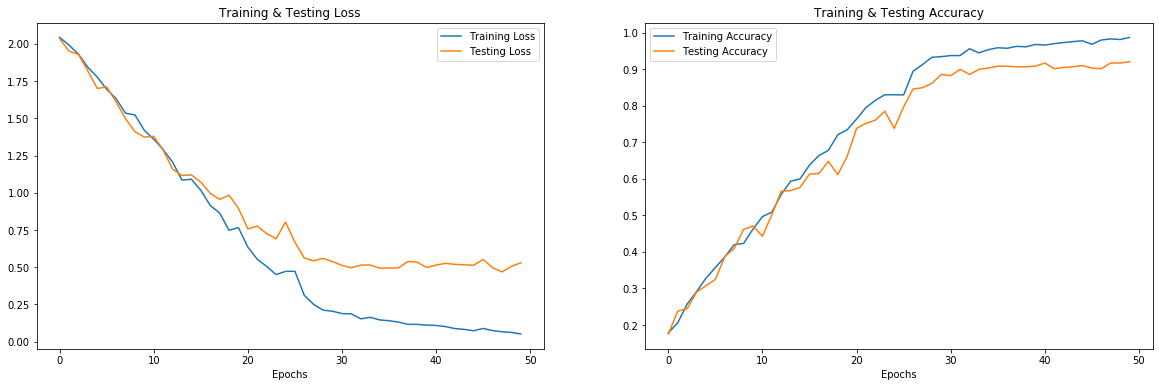

In [14]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,test_pred)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [15]:
print("Accuracy of our model on training data : ")
model.evaluate(x_train,y_train)[1]*100

Accuracy of our model on training data : 
2304/2304 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 96us/step


100.0

In [16]:
print("Accuracy of our model on test data : ")
model.evaluate(x_test,y_test)[1]*100

Accuracy of our model on training data : 
576/576 [==============================] - ETA:  - 0s 92us/step


92.01388955116272

### Building Confusion Matrix and Classification Report

In [17]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [18]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,angry,angry
2,calm,sad
3,calm,calm
4,neutral,neutral
5,calm,sad
6,disgust,disgust
7,happy,happy
8,neutral,neutral
9,angry,angry


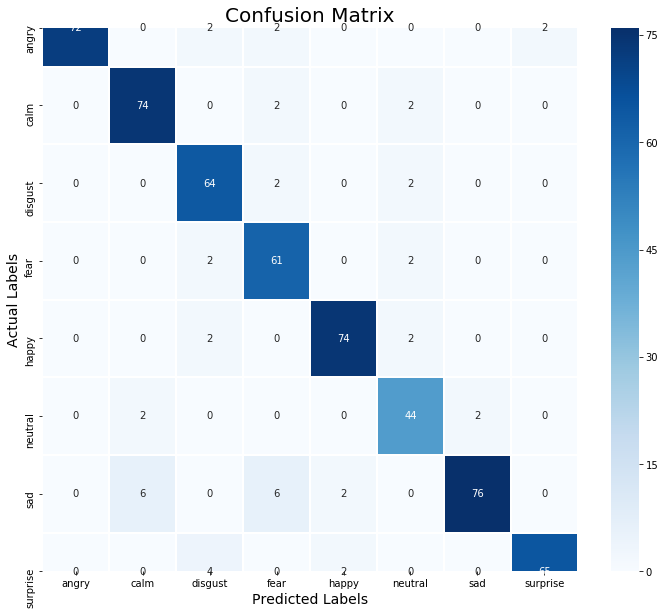

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


In [20]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       angry       1.00      0.92      0.96        78
        calm       0.90      0.95      0.92        78
     disgust       0.86      0.94      0.90        68
        fear       0.84      0.94      0.88        65
       happy       0.95      0.95      0.95        78
     neutral       0.85      0.92      0.88        48
         sad       0.97      0.84      0.90        90
    surprise       0.97      0.92      0.94        71

    accuracy                           0.92       576
   macro avg       0.92      0.92      0.92       576
weighted avg       0.92      0.92      0.92       576



### Saving Model

In [21]:
from keras.models import load_model
from keras.models import model_from_json
model_json = model.to_json()
with open("model_CNN.json", "w") as json_file:
    json_file.write(model_json)

In [22]:
model.save_weights("model_LSTM.h5")